# Simulating Geometric Brownian Motion (GBM)

Geometric Brownian Motion is the canonical model for asset prices under both real-world and **risk-neutral** measures:

$
dS_t = \mu S_t\,dt + \sigma S_t\,dW_t ,
$

where

| Symbol | Description |
|--------|-------------|
| $(S_t)$ | asset price |
| $(\mu)$ | drift (use \(r\) under risk-neutral pricing) |
| $(\sigma)$ | volatility |
| $(W_t)$ | standard Brownian motion |

This notebook:

1. Implements a simple Euler-Maruyama discretisation of GBM;  
2. Visualises simulated price paths;  
3. Verifies that the simulated terminal distribution matches the analytical **log-normal** density.

The simulator will be reused by later Monte-Carlo pricing notebooks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def simulate_gbm_paths(S0, mu, sigma, T, N, M, seed=42):
    """
    Simulate M paths of geometric Brownian motion.

    Parameters
    ----------
    S0 : Initial asset price.
    mu : Drift (set to risk-free rate r for pricing).
    sigma : Volatility.
    T : Maturity in years.
    N : Time steps.
    M : Number of simulated paths.
    seed : RNG seed for reproducibility.
    """
    np.random.seed(seed)
    dt = T / N
    Z = np.random.randn(M, N)  # standard normals
    increments = (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z
    log_paths = np.cumsum(np.hstack([np.log(S0) * np.ones((M, 1)), increments]), axis=1)
    return np.exp(log_paths)  # shape (M, N+1)

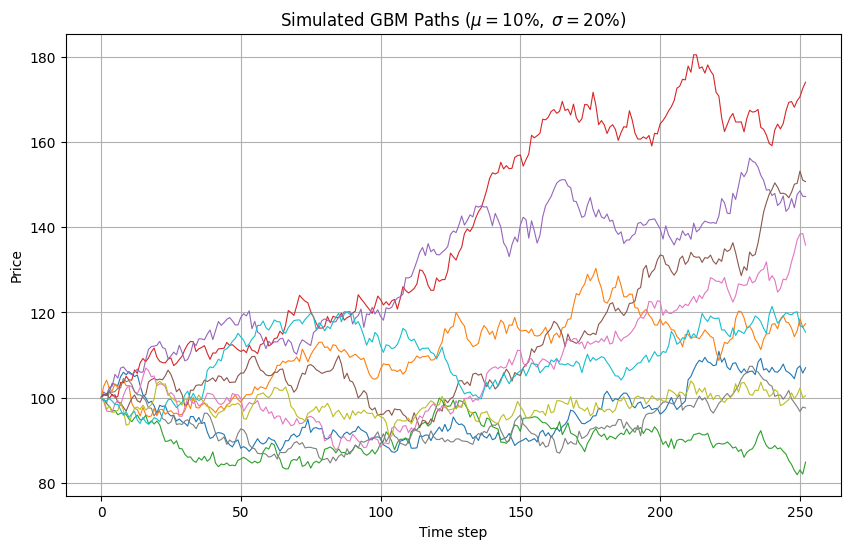

In [2]:
paths = simulate_gbm_paths(S0=100, mu=0.10, sigma=0.20, T=1, N=252, M=10)

plt.figure(figsize=(10, 6))
plt.plot(paths.T, lw=0.8)
plt.title("Simulated GBM Paths ($\\mu=10\\%,\\;\\sigma=20\\%$)")
plt.xlabel("Time step")
plt.ylabel("Price")
plt.grid(True)
plt.show()

Ten sample paths under the **real-world drift** $( \mu = 10\% )$.  
Note the log-normal growth and increasing spread over time.

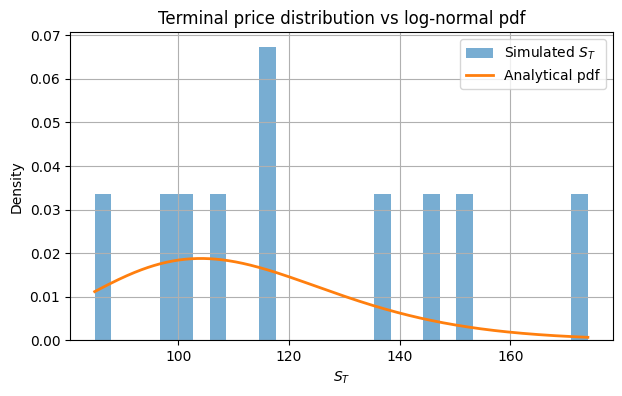

In [3]:
S_T = paths[:, -1]
mean_theoretical = 100 * np.exp(0.10 * 1)
var_theoretical = (100**2) * np.exp(2 * 0.10 * 1) * (np.exp(0.20**2 * 1) - 1)

plt.figure(figsize=(7, 4))
plt.hist(S_T, bins=30, density=True, alpha=0.6, label="Simulated $S_T$")

# analytical log-normal pdf
import scipy.stats as st

x = np.linspace(min(S_T), max(S_T), 400)
pdf = st.lognorm(
    s=0.20 * np.sqrt(1), scale=100 * np.exp((0.10 - 0.5 * 0.20**2) * 1)
).pdf(x)
plt.plot(x, pdf, lw=2, label="Analytical pdf")
plt.xlabel("$S_T$")
plt.ylabel("Density")
plt.title("Terminal price distribution vs log-normal pdf")
plt.legend()
plt.grid(True)
plt.show()

The histogram of simulated terminal prices aligns well with the analytical log-normal density, confirming the correctness of our discretisation.

## Key take-aways

* Discrete-time GBM simulation is lightweight and vectorisable.  
* Under risk-neutral pricing, set **`mu = r`** this same function is called by later Monte-Carlo option-pricing notebooks.  
* Validation via the terminal log-normal pdf builds confidence before we move on to more complex payoffs and variance-reduction techniques.